# Read and analyze case 6126 E08

**BMED320: Methods in biomedical research (IMC-ML)**<br>
_Arvid Lundervold, 20200928_

See: https://github.com/arvidl/BMED320-imaging-mass-cytometry-ml/blob/master/notebooks/imc-case-damond-2019/README.md

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

In [24]:
fn_tiff = './data/E08_a0_full.tiff'
fn_csv = './data/E08_a0_full.csv'
fn_panel = './data/table1_IMC_panel_37x4.csv'

In [25]:
im = io.imread(fn_tiff)
print(im.shape)

(37, 530, 567)


In [32]:
n_chn = im.shape[0]
n_chn

37

In [26]:
df = pd.read_csv(fn_csv, usecols=[0], names=['chn'], header=None)
df.shape

(37, 1)

In [27]:
df.head()

,chn
0,In113
1,In115
2,Pr141
3,Nd142
4,Nd143


In [28]:
df.tail()

,chn
32,Yb174
33,Lu175
34,Yb176
35,Ir191
36,Ir193


In [57]:
df.chn.iloc[0]

'In113'

In [30]:
df_p = pd.read_csv(fn_panel)
print(df_p.shape)
df_p

(37, 4)


,Short Name,Antigen,Main Target Cells,Metal Tag
0,INS,Insulin,β,141Pr
1,PIN,Proinsulin,β,154Sm
2,GCG,Glucagon,α,156Gd
3,SST,Somatostatin,δ,159Tb
4,PPY,Pancreatic polypeptide,γ,153Eu
5,NKX6-1,Homeobox protein Nkx-6.1,β,169Tm
6,PDX1,Pancreatic and duodenal homeobox 1,β δ ductal,158Gd
7,IAPP,Amylin,β,167Er
8,PCSK2,Proprotein convertase 2,α,144Nd
9,SYP,Synaptophysin,Endocrine,160Gd


### Plot all channels (except for the last) as a 6 x 6 grid

With histogram equalization for better visualization
https://stackoverflow.com/questions/28518684/histogram-equalization-of-grayscale-images-with-numpy

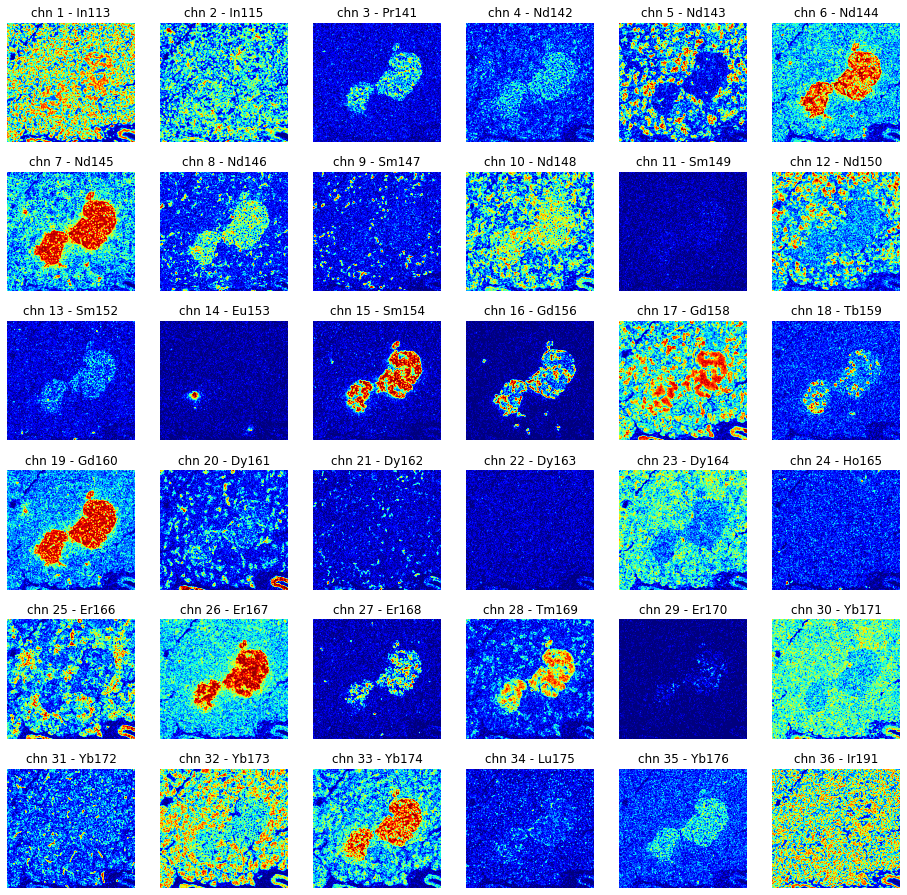

In [58]:
fig, axes = plt.subplots(6, 6, figsize=(16, 16), sharex=False, sharey=False)
ax = axes.ravel()
for i, item in enumerate(range(n_chn-1)):
    chn = np.squeeze(im[i,:,:])
    chn_eq = np.sort(chn.ravel()).searchsorted(chn)
    ax[i].imshow(chn_eq, cmap='jet' )   # cmap='jet', 'gray'
    ax[i].set_title('chn %d - %s' % ((i+1), df.chn.iloc[i]))
    ax[i].axis('off')
plt.show()

## EXTRA

**Create a Z-stack with numpy**
https://forum.image.sc/t/create-a-z-stack-with-numpy/28379


I tried creating a simple/random 5D image like so:

```
data_0 = np.random.randint(0, 255, (2, 5, 3, 300, 300), 'uint8')

with tifffile.TiffWriter('path/to/temp.ome.tiff') as tif:
    tif.save(data_0, metadata={'axes':'TZCYX'})
````

**Problem**

When I try opening it with Fiji, a have a 300X300 colored image but the SizeZ is 1 and SizeT is 10.


**A:** you might get what you want by using imagej=True in the TiffWriter constructor:

``` 
with tifffile.TiffWriter('path/to/temp.ome.tiff', imagej=True) as tif:
    tif.save(data_0)

#or directly
tifffile.imwrite('path/to/temp.ome.tiff', data_0, imagej=True)
```

````
imagej : bool
      If True, write an ImageJ hyperstack compatible file.
      This format can handle data types uint8, uint16, or float32 and
      data shapes up to 6 dimensions in TZCYXS order.
      RGB images (S=3 or S=4) must be uint8.
      ImageJ's default byte order is big-endian but this implementation
      uses the system's native byte order by default.
      ImageJ hyperstacks do not support BigTIFF or compression.
      The ImageJ file format is undocumented.
      When using compression, use ImageJ's Bio-Formats import function.
````
